<a href="https://colab.research.google.com/github/QAtester-MM/Data-Science_Machine-Learning/blob/master/Exploratory_Data_Analysis_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import zipfile
with zipfile.ZipFile("/content/it_mlapmldj_01_enus_02.zip", "r") as zipf:
  zipf.extractall("/content/test/")
  zipf.extractall("/content/train/")

In [67]:
# numpy the fundamental pkg for scientific computing with Python & includes linear algebra class
import numpy as np 

# pandas library provides hi-perf data structures and data analysis tools for Python
import pandas as pd 

# matplotlib is a fundamental 2D plotting library for Python 
# seaborn is a powerful and useful data visualization library based on matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [10]:
test_df = pd.read_csv("/content/test/it_mlapmldj_01_enus_02/exploratory_data_analysis/test.csv")
train_df = pd.read_csv("/content/test/it_mlapmldj_01_enus_02/exploratory_data_analysis/train.csv")

In [11]:
##### .info() распечатает краткий обзор данных из нашего датафрейма
train_df.info() #### видим, что по возрасту (п.5) и кабинам (п.10) у нас недостаточно данных (пропущенные данные)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_df.shape  #### видим, что метод .info() гораздо информативнее, чем .shape()

(891, 12)

In [17]:
train_df.describe()    ##### просмотрим краткий статистический обзор данных датафрейма

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train_df.head(10) ##### так выглядят первые 10 строк нашего датафрейма, в следующей строке выделим только нкужную нам часть данных

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
##### выбираем только необходимые колоки и число записей
train_df[["Survived","Pclass","Sex","Age"]][0:5]

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [26]:
##### используя value_counts() определяем количество значений в определенной колонке
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
##### посчитаем то же самое в процентах с точностью до 2-х знаков после запятой
round(train_df['Sex'].value_counts(normalize=True)*100,2)

male      64.76
female    35.24
Name: Sex, dtype: float64

In [33]:
##### .crosstab() сформирует нам кросс-табличку 2-х (или более) факторов
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


#Exploratory Data Analysis
оцениваем качество нашего датафрейма

In [44]:
total_missing = train_df.isnull().sum().sort_values(ascending=False)
col_pct_missing = round(train_df.isnull().sum()/train_df.isnull().count()*100,1).sort_values(ascending=False)
missing_data = pd.concat([total_missing, col_pct_missing], axis=1, keys = ["Total Missing", "% Missing"])
missing_data.head(7)

,Total Missing,% Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [37]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarni

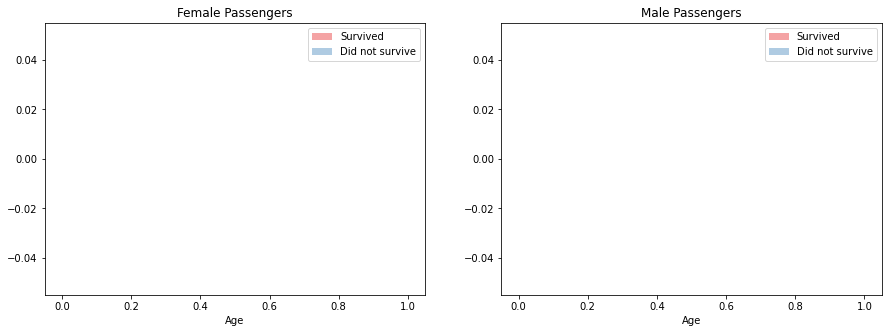

In [66]:
# a nice pair of histograms to examine the binned ages of the different sexes that did and did not survive
sns.set_palette("Set1")
yes = 'Survived'
no  = 'Did not survive'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
# if you want to run this after remapping sex male,female-> 0,1 uncomment these lines
#women = train_df[train_df['Sex']==1]
#men = train_df[train_df['Sex']==0]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=10, label = yes, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = no, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female Passengers')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=10, label = yes, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = no, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male Passengers')
                  


In [57]:
# now remap the sex feature to binary value 0 for male, 1 for female 
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [58]:
# we can drop the Cabin feature as it provides us with little insight, it just has too many missing values
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [59]:
# now let's get another summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [60]:
# fixing Embarked, fill the two missing values with the most common feature value
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [61]:
# fixing the Age feature is a little more involved... let's take both datasets
df = [train_df, test_df]

for dataset in df:
    # for each dataset, generate an array of random ages using randint() 
    # returns random integers from low (mean - std) to high (mean + std)
    mean_age = train_df["Age"].mean()
    std_age = train_df["Age"].std()
    num_missing = dataset["Age"].isnull().sum()
    low = mean_age - std_age
    high = mean_age + std_age
    random_age = np.random.randint(low, high, size = num_missing)

    # where there are missing values in Age column, replace them with random age
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

print("# missing from Age column:",train_df["Age"].isnull().sum())

# missing from Age column: 0


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,0.0,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,NaN,29.590348,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,NaN,13.527644,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,NaN,80.000000,8.000000,6.000000,512.329200
